# Regresión Lineal multivariada

En este notebook se realizará tanto el preprocesamiento de datos como la implementación y entrenamiento del modelo de **Regresión lineal multivariable**.

---

Primeramente se analizarán los datos obtenidos desde el csv (archivo que contiene los datos) de los precios de los vuelos.

En este apartado realizaremos:
- Identificación de valores extremos mediante la utilización de diagramas de caja.
- Manejo de registros duplicados.
- Visualización general de los datos.

---

**Importación de las librerias a utilizar y del archivo de datos**

Se importan las librerías a utilizar durante todo el proyecto, entre las cuales podemos mencionar:
- **Pandas**: Es una librería que permite la manipulación y el análisis de datos. Nos permitirá realizar la manipulación de los datos desde nuestra fuente de datos.
- **Numpy**: Es una librería que se utiliza para trabajar con arrays. Además de incluir funciones en el dominio del álgebra lineal, transformadas de fourier (en este trabajo no serán utilizadas) y matrices.
- **Matplotlib.pyplot**: Esta librería nos ayudará para poder realizar gráficos y observar de una mejor manera los datos visualmente

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Ya que tenemos las librerías necesarias para trabajar, procedemos a importar los datos con los que vamos a trabajar.

Podemos observar un ejemplo de los datos que incluye la tabla:

In [193]:
df = pd.read_csv('Clean_Dataset.csv')

---

### Análisis de los datos

A continuación realizaremos un análisis de los datos que se han obtenido desde nuestra fuente de datos.

#### Análisis estadístico

In [194]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


Debido a que estamos trabajando principalmente con los datos del precio de los vuelos, es en esta columna donde centraremos nuesto análisis.

**Análisis de medidas de tendencia central**

Mediante tabla tabla anterior podemos visualizar las medidas de tendencia central y de dispersión de los datos numéricos. Primeramente se nos muestra que tenemos 300153 datos en total.
Con una media de 20889.66$ en los precios y una mediana de 7425$. Esta gran diferencia existente entre la media y la mediana de los datos, nos puede dar un indicador de que los datos no se encuentran acumulados en el centro, más bien poseemos datos muy dispersos.

Gracias a los cuartiles que nos ofrecen las medidas, podemos concluir que (además que los datos se encuentran dispersos) los precios se encuentran mayormente agrupado en valores bajos de precios. 

**Análisis de valores extremos**

A continuación realizaremos un análisis para verificar si los datos de los precios poseen datos extremos (o outliers). Esto debido a que la existencia de valores extremos al buscar una función que permita aproximar el valor de los datos pueden generar un gran impacto al generar la recta de regresión; además de sesgar fuertemente el modelo, lo que hace que se vuelva menos representativo con respecto al comportamiento general de los datos.


Para poder verificar la existencia de valores extremos, buscaremos encontrar dentro de qué rango, los datos pueden ser representativos.
Esto se calcula encontrando el rango intercuartílico (R.I); Este se encuentra realizando la resta entre los cuartiles 3 y 1 (en la tabla de descripción de los datos están representados como el 75% y el 25%):

Sea $Q_{n}$ el cuartil $n$:
$$
\mathbf{R.I}=Q_{3}-Q_{1}
$$
Al realizar esta operación con los datos obtenidos, obtenemos que nuestro rango intercuartílico es de:
$$
\mathbf{R.I}=42521-4783=37738
$$

Con el R.I obtenido, podemos encontrar el intervalo donde los datos son representativos, esto se calcula de la siguiente manera:
$$
\begin{gather*}
[Q_{1}-1.5\cdot \mathbf{R.I},\, Q_{3}+1.5\cdot \mathbf{R.I}]\\
[4783-1.5\cdot 37738,\, 42521+1.5\cdot 37738 ]\\
[-51824,\, 99128]
\end{gather*}
$$

Debido a que el valor del límite inferior del intervalo sale del dominio de los valores de los precios, se tomará que el límite inferior será el valor mínimo existente en los datos (que es de 1105$):
$$
[1105,\, 99128]
$$

In [195]:
df[df['price'] > 99128]

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
215858,215858,Vistara,UK-809,Delhi,Evening,two_or_more,Evening,Kolkata,Business,21.08,1,114434
215859,215859,Vistara,UK-809,Delhi,Evening,two_or_more,Evening,Kolkata,Business,21.08,1,116562
216025,216025,Vistara,UK-817,Delhi,Evening,two_or_more,Morning,Kolkata,Business,17.58,4,100395
216094,216094,Vistara,UK-995,Delhi,Morning,one,Evening,Kolkata,Business,6.50,5,99129
216095,216095,Vistara,UK-963,Delhi,Morning,one,Evening,Kolkata,Business,8.00,5,101369
...,...,...,...,...,...,...,...,...,...,...,...,...
293474,293474,Vistara,UK-836,Chennai,Morning,one,Night,Bangalore,Business,9.67,3,107597
296001,296001,Vistara,UK-838,Chennai,Night,one,Morning,Kolkata,Business,11.50,3,102832
296081,296081,Vistara,UK-832,Chennai,Early_Morning,one,Night,Kolkata,Business,15.83,5,102384
296170,296170,Vistara,UK-838,Chennai,Night,one,Morning,Kolkata,Business,11.50,7,104624


En la tabla anterior se nos presentan los datos atípicos (no se encuentran dentro de el intervalo de datos de confianza). Debido a que el límite inferior del intérvalo es el valor mínimo de los datos, no existe ningún valor atípico por debajo del límite.

En total existen 123 datos que se encuentra fuera de nuestro intervalo de datos de confianaza, más adelante explicaremos que haremos con estos datos.

**Diagrama de cajas y bigotes**

Un diagrama de cajas y bigotes nos permite tener una visualización general de los datos y su comportamiento.

La caja del diagrama se genera en los puntos de los tres cuartiles, empezando en el cuartil 1 y finalizando en el 3. A su vez, los bigotes se extienden 1.5 veces el rango intercuartílico a partir del cuartil 1 y 3 (estos representan nuestro intervalo de datos de confianza); Por fuera de los bigotes se muestran los datos atípicos.

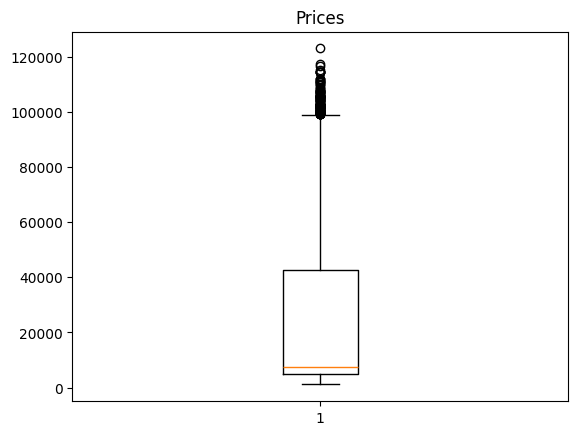

In [196]:
plt.boxplot(df['price'])
plt.title('Prices')
plt.show()

Gracias al gráfico podemos observar de una mejor forma que los datos se encuentran agrupados mayormente en precios bajos, y debido a la existencia de valores muy altos, genera una mayor dispersión de los datos.

---

### Consideración de variables para regresión

A continuación consideraremos que variables deberíamos de tomar para poder realizar la regresión lineal multivariable.

Primeramente tenemos que saber con que columnas estamos contando y que tipo de valores poseen:

In [197]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [198]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [199]:
df.flight.value_counts()

flight
UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
SG-9923       1
6E-6474       1
6E-865        1
G8-705        1
G8-107        1
Name: count, Length: 1561, dtype: int64

In [200]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [201]:
df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [202]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [203]:
df.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [204]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [205]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [206]:
df.duration.value_counts()

duration
2.17     4242
2.25     4036
2.75     2879
2.08     2755
2.83     2323
         ... 
37.17       1
38.75       1
38.50       1
36.25       1
41.50       1
Name: count, Length: 476, dtype: int64

In [207]:
df.days_left.value_counts()

days_left
25    6633
18    6602
39    6593
32    6585
26    6573
24    6542
19    6537
31    6534
33    6532
40    6531
41    6525
28    6522
38    6512
20    6502
30    6501
42    6497
22    6494
36    6490
21    6479
37    6476
43    6472
44    6436
17    6419
11    6417
34    6412
13    6404
23    6401
29    6397
12    6381
27    6360
14    6349
15    6340
45    6314
35    6291
16    6272
46    6160
49    6154
48    6078
47    6069
10    5822
8     5767
6     5740
7     5703
9     5665
5     5392
4     5077
3     4248
2     4026
1     1927
Name: count, dtype: int64

Tras haber realizado una vista general de los datos, podemos clasificarlos entre si tomarlos o no:

| Variable           | Tipo        | A utilizar | Justificación                                                                 |
|--------------------|-------------|------------|--------------------------------------------------------------------------------|
| `airline`          | Categórica  | Sí         | Algunas aerolíneas pueden costar más que otras                                 |
| `flight`           | Categórica  | No         | Es muy específica, no aporta nada al análisis                                  |
| `source_city`      | Categórica  | Sí         | Puede influir en el precio                                                     |
| `departure_time`   | Categórica  | Sí         | La hora de salida puede influir en el costo del viaje                          |
| `stops`            | Categórica  | Sí         | La cantidad de paradas en un viaje puede cambiar el precio                     |
| `arrival_time`     | Categórica  | Sí         | De igual forma que la salida, esta también puede afectar en el precio          |
| `destination_city` | Categórica  | Sí         | La ciudad a la que se viaja puede cambiar el precio                            |
| `class`            | Categórica  | Sí         | La clase económica contra la de trabajo afecta en gran manera el precio        |
| `duration`         | Numérica    | Sí         | Mayor duración implica mayor distancia, lo que implica mayor costo             |
| `days_left`        | Numérica    | Sí         | La proximidad de la fecha del vuelo afecta en el costo                         |


Ya con consideraciónes sobre las variables a utilizar, procederemos a preparar nuestra lista de variables a utilizar.

Primeramente, eliminaremos la columna `Unnamed: 0` ya que es solo la columna de índices, y la columna `flight` ya que por el análisis anterior, no la utilizaremos.

A su vez, lo que haremos será cambiar los valores de la columna `class` a 0 y 1 (ya que solo existen dos clases).

In [208]:
df = df.drop(columns=['Unnamed: 0', 'flight'])

df['class'] = df['class'].apply(lambda x: 1 if x=='Business' else 0)

A su vez, cambiaremos los valores de la columna `stops` por valores numéricos para mayor facilidad al manejar los datos:

In [209]:
df.stops = pd.factorize(df.stops)[0]

Procederemos a realizar el preprocesamiento de las variables categóricas.

Primeramente agruparemos valores poco frecuentes y luego convertiremos categorías a variables numéricas:

In [210]:
# Recorreremos las columnas categóricas principales y contaremos cuantas veces aparecen estas categorías
for col in ['airline', 'source_city', 'destination_city', 'departure_time', 'arrival_time']:
    counts = df[col].value_counts()
    common = counts[counts > 100].index  # Si una de estas categorías aparece menos de 100 veces, será reemplazada por "Other"
    df[col] = df[col].where(df[col].isin(common), other='Other')

# Procedemos a aplicar One-hot encoding a las columnas indicadas, esto nos permitirá convertir estas categorías en columnas booleanas
df = pd.get_dummies(df, columns=[
    'airline', 'source_city', 'destination_city',
    'departure_time', 'arrival_time', 'stops', 'class'
], drop_first=True)#Esta parte evita multicolinealidad al eliminar la primera categoría.

df

,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,...,departure_time_Morning,departure_time_Night,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,stops_1,stops_2,class_1
0,2.17,1,5953,False,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,False
1,2.33,1,5953,False,False,False,True,False,False,True,...,False,False,False,False,False,True,False,False,False,False
2,2.17,1,5956,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
3,2.25,1,5955,False,False,False,False,True,False,True,...,True,False,False,False,False,False,False,False,False,False
4,2.33,1,5955,False,False,False,False,True,False,True,...,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,10.08,49,69265,False,False,False,False,True,True,False,...,True,False,False,True,False,False,False,True,False,True
300149,10.42,49,77105,False,False,False,False,True,True,False,...,False,False,False,False,False,False,True,True,False,True
300150,13.83,49,79099,False,False,False,False,True,True,False,...,False,False,False,False,False,False,True,True,False,True
300151,10.00,49,81585,False,False,False,False,True,True,False,...,False,False,False,True,False,False,False,True,False,True


Finalmente, trabajaremos con los datos repetidos y con los valores extremos.

Para eliminar datos repetidos, simplemente ejecutaremos la función:

In [211]:
df = df.drop_duplicates()

Ahora eliminaremos las filas que posean los datos extremos:

In [212]:
df = df[df['price'] < 99128]
df['price'].max()

98972

Ya con la tabla preparada con los datos necesarios a utilizar, generaremos nuestros vectores de datos:

In [213]:
x = df.drop(columns='price')
y = df['price']

#Agregamos la columna de interceptos
x.insert(0, 'intercept', 1)

x = x.astype(float)
y = y.astype(float)

#Convertimos a matrices con NumPy
X_matrix = x.to_numpy()
Y_vector = y.to_numpy().reshape(-1,1)

Ya hemos preparado nuestros datos a utilizar, por lo que ahora procederemos a la siguiente parte.

---

### Regresión lineal multivariable

Con nuestras variables a utilizar definidas, y con nuestros valores objetivos, procederemos a realizar la regresión multivariable.

Para esto buscaremos encontrar los coeficientes de una función lineal multivariada que permita dar una buena aproximación de los precios. Encontraremos estos coeficientes haciendo la regresión lineal multivariable con el algoritmo del descenso del gradiente con momento.

intercept:2616.1204
duration:89.1471
days_left:-128.6475
airline_Air_India:685.6378
airline_GO_FIRST:-231.6734
airline_Indigo:486.5936
airline_SpiceJet:-584.3656
airline_Vistara:4434.3207
source_city_Chennai:426.8334
source_city_Delhi:-1066.2314
source_city_Hyderabad:-1275.2759
source_city_Kolkata:2249.0962
source_city_Mumbai:43.7802
destination_city_Chennai:451.7436
destination_city_Delhi:-1271.8414
destination_city_Hyderabad:-1278.7247
destination_city_Kolkata:2162.6417
destination_city_Mumbai:156.0510
departure_time_Early_Morning:611.7032
departure_time_Evening:435.4808
departure_time_Late_Night:114.8406
departure_time_Morning:623.1856
departure_time_Night:155.1189
arrival_time_Early_Morning:-463.1816
arrival_time_Evening:911.5567
arrival_time_Late_Night:651.5667
arrival_time_Morning:81.8586
arrival_time_Night:1074.2884
stops_1:4635.1706
stops_2:1898.1134
class_1:43367.7764


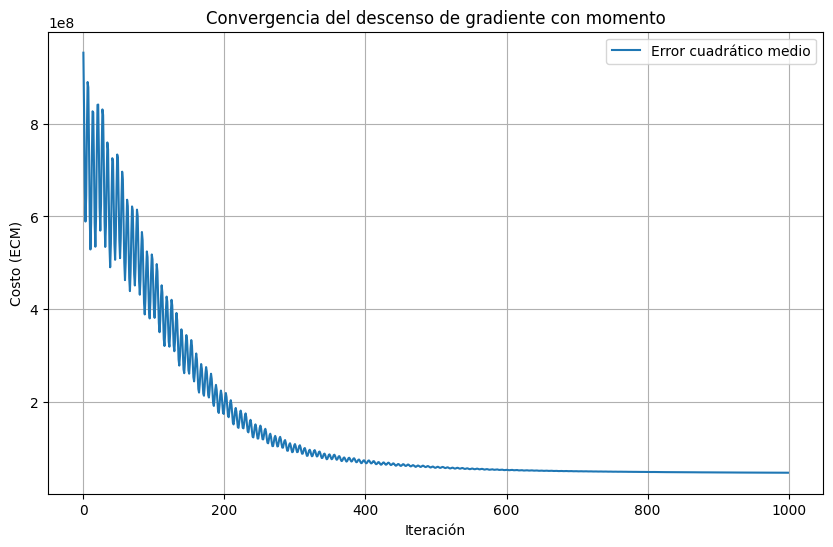

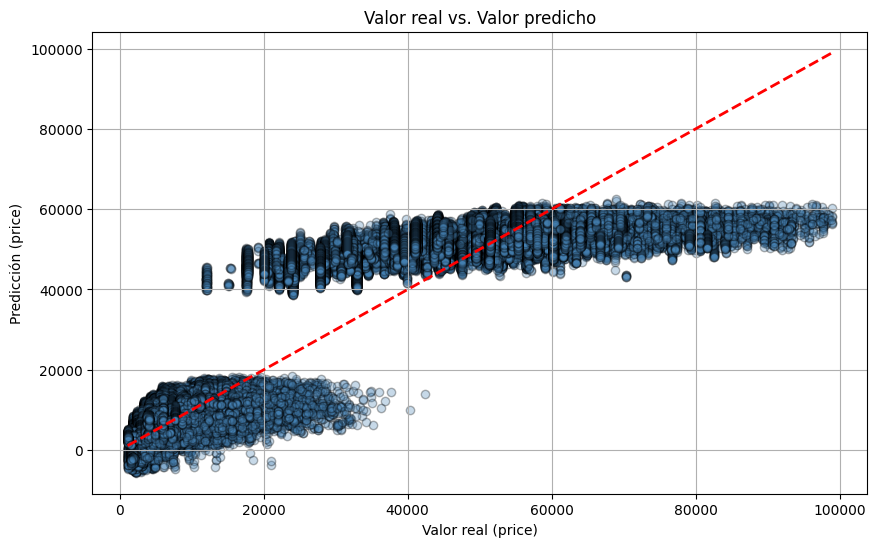

In [214]:
# Primeramente vamos a inicializar nuestros coeficientes
n = X_matrix.shape[1]
a = np.random.randn(n, 1)

# Parámetros del algoritmo
learning_rate = 1e-2
num_iters = 1000
momentum_factor = 0.99
v = np.zeros_like(a)

errors = []


# Aplicamos descenso del gradiente con momento

for i in range(num_iters):
    prediction = X_matrix @ a
    error = prediction - Y_vector
    gradient = 2*X_matrix.T @ error/ len(y)

    # Encontrando la velocidad
    v = momentum_factor*v + (1 - momentum_factor)*gradient

    # Obteniendo nuevos coeficientes
    a -= learning_rate * v

    # Calcular el costo
    cost = np.mean(error**2)
    errors.append(cost)

# Finalmente mostramos los coeficientes finales 
column_names = df.drop(columns='price').columns.insert(0, 'intercept')

for name, coef in zip(column_names, a.flatten()):
    print(f'{name}:{coef:.4f}')

# Mostramos la progresión del error
plt.figure(figsize=(10, 6))
plt.plot(errors, label='Error cuadrático medio')
plt.xlabel('Iteración')
plt.ylabel('Costo (ECM)')
plt.title('Convergencia del descenso de gradiente con momento')
plt.grid(True)
plt.legend()
plt.show()

# Mostramos la comparación entre los valores reales y los predichos
y_pred = X_matrix @ a
plt.figure(figsize=(10, 6))
plt.scatter(Y_vector, y_pred, alpha=0.3, color='steelblue', edgecolors='k')
plt.plot([Y_vector.min(), Y_vector.max()], [Y_vector.min(), Y_vector.max()], 'r--', lw=2)
plt.xlabel('Valor real (price)')
plt.ylabel('Predicción (price)')
plt.title('Valor real vs. Valor predicho')
plt.grid(True)
plt.show()

---

### Análisis de los datos obtenidos

Después de obtener los coeficientes al aplicar nuestra regresión, hemos llegado a una regresión lineal que podría ajustarse a una gran mayoría de los datos.

Si queremos obtener una forma de identificar si nuestro modelo genera una buena representación de los datos dados podemos utilizar el **coeficiente de determinación**, que nos indica que tanto porcentaje de los datos pueden ser representados por nuestro modelo. 

Este coeficiente se calcula con la siguiente expresión:

$$
R^{2}=1- \frac{\mathbf{SSE}}{\mathbf{SST}}=\frac{\sum (y_{i}-y^{*})^{2}}{\sum(y_{i}-\bar{y})^2}
$$

Donde $\mathbf{SSE}$ es la suma de los errores cuadrados, $y_{i}$ nuestros valores reales, $y^{*}$ nuestros valores predichos, $\bar{y}$ la media de nuestros valores reales y $\mathbf{SST}$ la suma total de los cuadrados.

In [215]:
def calcular_r2(y_real, y_pred):
    ss_res = np.sum((y_real - y_pred)**2)  #(SSE)
    ss_tot = np.sum((y_real - np.mean(y_real))**2)  #(SST)
    r2 = 1 - (ss_res / ss_tot)
    return r2

r2 = calcular_r2(Y_vector, X_matrix @ a)
print("R²:", r2)


R²: 0.9083712903555374


Tras nuestro cálculo, obtuvimos que $R^{2}\approx 0.91$ es decir que aproximadamente el 91% de los datos pueden ser modeladelados por nuestro modelo encontrado.

#### ¿Por qué escogimos esos valores?

Al trabajar con el método de gradiente descendente con momento, fueron necesarias la utilización de dos coeficientes, nuestro coeficiente de aprendizaje (cuyo valor utilizado fue de $1\cdot 10^{-2}$), y el factor de momento (Con valor de 0.99).
Después de haber realizado distintas combinaciones, estos valores fueron seleccionados debido a que proporcionaban una convergencia estable, evitando oscilaciones y minimizando el error de manera eficiente.